<a href="https://colab.research.google.com/github/Nareshjanne123/Data-Science-Assignments/blob/main/Forecast_for_CocaCola_sales_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Forecast the CocaCola prices data set. Prepare a document for each model explaining.**

# **how many dummy variables you have created and RMSE value for each model. Finally which model you will use for Forecasting.**

In [1]:
from google.colab import files
upload=files.upload()

Saving CocaCola_Sales_Rawdata.xlsx to CocaCola_Sales_Rawdata.xlsx


In [2]:
import pandas as pd
df=pd.read_excel("CocaCola_Sales_Rawdata.xlsx")
df

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


<Axes: >

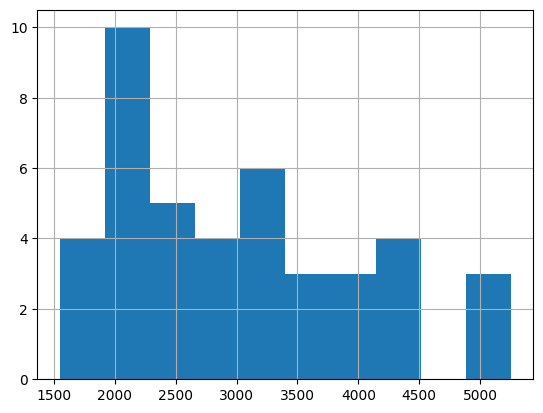

In [3]:
import matplotlib.pyplot as plt
df.Sales.hist()


In [4]:
import numpy as np
Quarters=["Q1","Q2","Q3","Q4"]

In [5]:
p = df["Quarter"][0]
p[0:2]
df["quarter"]=0
df["Year"]=0

for i in range(42):
    p = df.loc[i, 'Quarter']
    df.loc[i,'quarter']= p[0:2]

for i in range(42):
    p = df.loc[i, 'Quarter']
    df.loc[i,'Year']= p[3:]

month_dummies =pd.get_dummies(df['quarter'])
month_dummies

,Q1,Q2,Q3,Q4
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0
5,0,1,0,0
6,0,0,1,0
7,0,0,0,1
8,1,0,0,0
9,0,1,0,0


In [6]:
df_Dummy=pd.concat([df,month_dummies],axis=1)
df_Dummy

,Quarter,Sales,quarter,Year,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,86,1,0,0,0
1,Q2_86,2244.960999,Q2,86,0,1,0,0
2,Q3_86,2533.804993,Q3,86,0,0,1,0
3,Q4_86,2154.962997,Q4,86,0,0,0,1
4,Q1_87,1547.818996,Q1,87,1,0,0,0
5,Q2_87,2104.411995,Q2,87,0,1,0,0
6,Q3_87,2014.362999,Q3,87,0,0,1,0
7,Q4_87,1991.746998,Q4,87,0,0,0,1
8,Q1_88,1869.049999,Q1,88,1,0,0,0
9,Q2_88,2313.631996,Q2,88,0,1,0,0


In [7]:
import numpy as np
df_Dummy["t"]=np.arange(1,43)

df_Dummy["t_square"]=np.square(df_Dummy["t"])

df_Dummy["Log_Sales"]=np.log(df_Dummy["Sales"])

df_Dummy

,Quarter,Sales,quarter,Year,Q1,Q2,Q3,Q4,t,t_square,Log_Sales
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,87,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3,87,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4,87,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1,88,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2,88,0,1,0,0,10,100,7.746574


<Axes: >

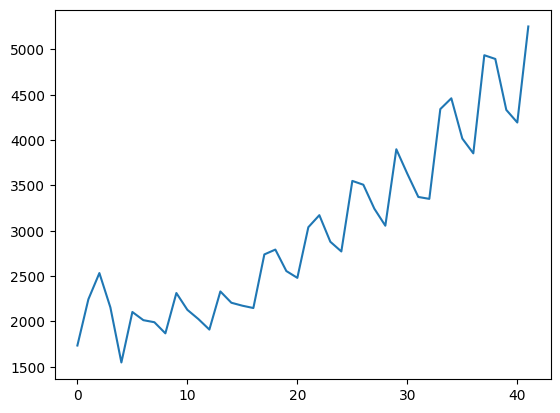

In [8]:
df_Dummy.Sales.plot()

<Axes: xlabel='quarter', ylabel='Year'>

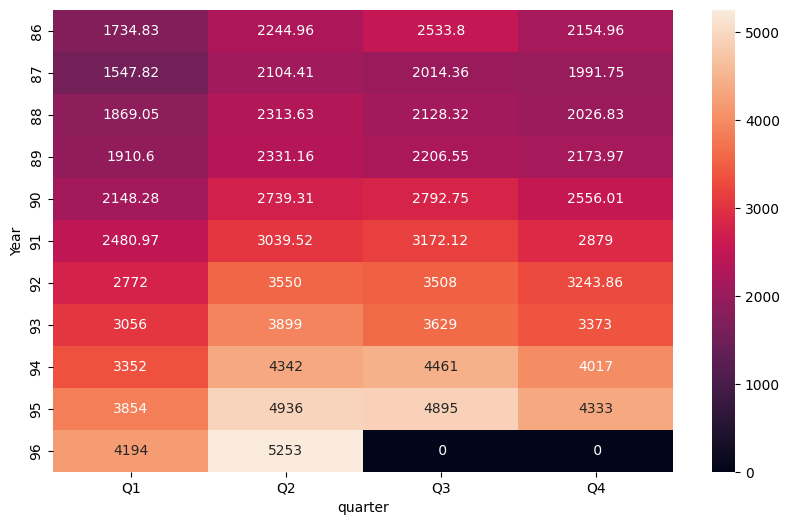

In [9]:
#EDA
import seaborn as sns

#Heat Map
plt.figure(figsize=(10,6))
Y_Quarter=pd.pivot_table(data=df_Dummy,values="Sales",index="Year",columns="quarter",aggfunc="mean",fill_value=0)
sns.heatmap(Y_Quarter,annot=True,fmt="2g")

<Axes: ylabel='Density'>

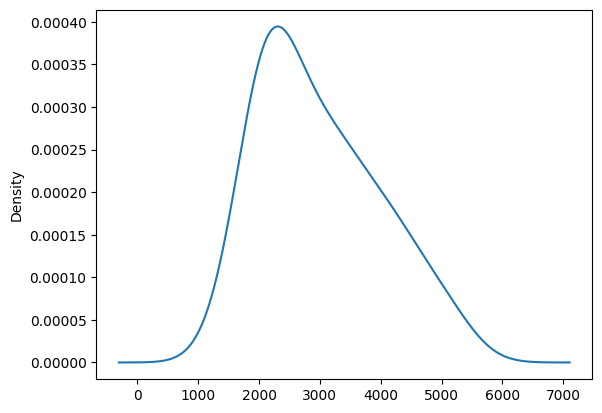

In [10]:
#Density plot and Lag plot
df_Dummy.Sales.plot(kind='kde')

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

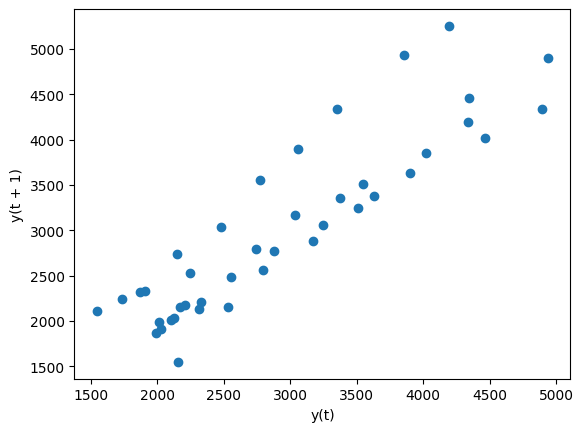

In [11]:

from pandas.plotting import lag_plot
lag_plot(df_Dummy.Sales)

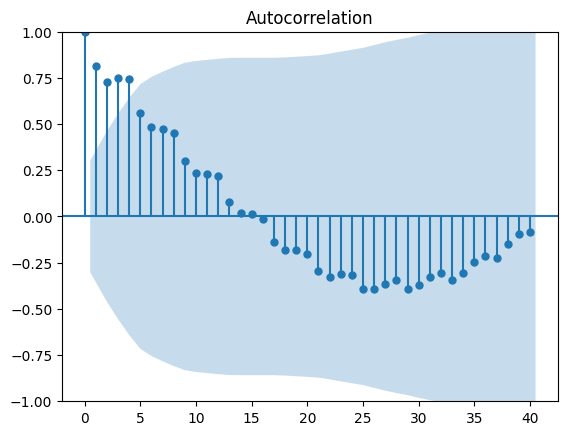

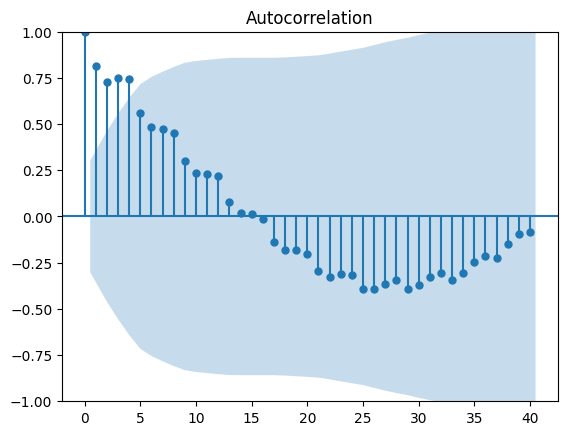

In [12]:
# create an autocorrelation plot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_Dummy.Sales,lags=40)

<Axes: xlabel='Year', ylabel='Sales'>

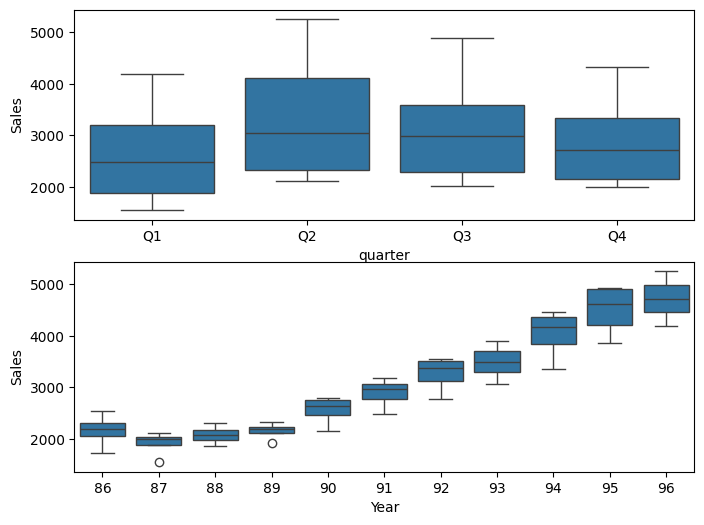

In [13]:
# Boxplot for ever
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="quarter",y="Sales",data=df_Dummy)

plt.subplot(212)
sns.boxplot(x="Year",y="Sales",data=df_Dummy)

<Axes: xlabel='quarter', ylabel='Sales'>

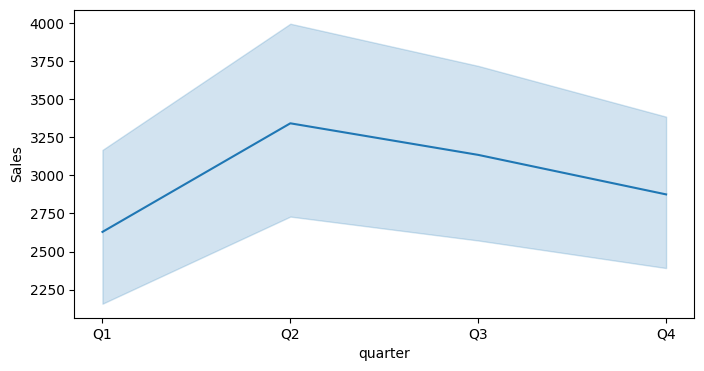

In [14]:

#Line Plot
plt.figure(figsize=(8,4))
sns.lineplot(x="quarter",y="Sales",data=df_Dummy)


In [15]:
train=df_Dummy.head(int(len(df_Dummy.quarter)*0.9))
test=df_Dummy.tail(len(df_Dummy.quarter)-len(train))

In [16]:
train

,Quarter,Sales,quarter,Year,Q1,Q2,Q3,Q4,t,t_square,Log_Sales
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,87,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3,87,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4,87,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1,88,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2,88,0,1,0,0,10,100,7.746574


In [17]:
test

,Quarter,Sales,quarter,Year,Q1,Q2,Q3,Q4,t,t_square,Log_Sales
37,Q2_95,4936.0,Q2,95,0,1,0,0,38,1444,8.504311
38,Q3_95,4895.0,Q3,95,0,0,1,0,39,1521,8.495970
39,Q4_95,4333.0,Q4,95,0,0,0,1,40,1600,8.374015
40,Q1_96,4194.0,Q1,96,1,0,0,0,41,1681,8.341410
41,Q2_96,5253.0,Q2,96,0,1,0,0,42,1764,8.566555


In [18]:
#Linear Model
import numpy as np
import statsmodels.formula.api as smf
Linear_model=smf.ols("Sales~t",data=train).fit()
pred_linear=Linear_model.predict(test["t"])
rmse_linear=np.sqrt(np.mean(test["Sales"]-np.array(pred_linear))**2)
rmse_linear

613.0885797796321

In [19]:
#Exponential
exp_model=smf.ols("Log_Sales~t",data=train).fit()
pred_exp_model=exp_model.predict(test["t"])
rmse_exp_model=np.sqrt(np.mean((test["Sales"])-(np.array(pred_exp_model)))**2)
rmse_exp_model

4713.8306396253665

In [20]:
#Quadratic
Quad=smf.ols("Sales~t+t_square",data=train).fit()
pred_Quad=Quad.predict(test[["t","t_square"]])
rmse_Quad=np.sqrt(np.mean((test["Sales"])-(np.array(pred_Quad)))**2)
rmse_Quad

37.60399333785608

In [21]:
#Additive seasonality
Add_sea=smf.ols("Sales~Q1+Q2+Q3+Q4",data=train).fit()
pred_add_sea=Add_sea.predict(test[["Q1","Q2","Q3","Q4"]])
rmse_add_sea=np.sqrt(np.mean(test["Sales"]-(np.array(pred_add_sea)))**2)
rmse_add_sea

1916.793673290675

In [22]:
#Additive Seasonality Quadratic
add_sea_quad=smf.ols("Sales~t+t_square+Q1+Q2+Q3+Q4",data=train).fit()
pred_add_sea_quad=add_sea_quad.predict(test[["t","t_square","Q1","Q2","Q3","Q4"]])
rmse_add_sea_quad=np.sqrt(np.mean(test["Sales"]-np.array((pred_add_sea_quad)))**2)
rmse_add_sea_quad

108.68666897485892

In [23]:
# Multiplicative Seasonality
mul_sea=smf.ols("Log_Sales~Q1+Q2+Q3+Q4",data=train).fit()
pred_Mult_sea=mul_sea.predict(test[["Log_Sales","Q1","Q2","Q3","Q4"]])
rmse_Mult_sea=np.sqrt(np.mean(test["Sales"]-(np.array(np.exp(pred_Mult_sea))))**2)
rmse_Mult_sea

2009.5556325551381

In [24]:
#Multiplicative Additive Seasonality
mul_add_sea=smf.ols("Log_Sales~t+Q1+Q2+Q3+Q4",data=train).fit()
pred_mul_add_sea=mul_add_sea.predict(test)
rmse_mul_add_sea=np.sqrt(np.mean(test["Sales"]-(np.array(pred_mul_add_sea)))**2)
rmse_mul_add_sea

4713.803270264603

In [25]:
#Compare the results
data = {"MODEL":pd.Series(["rmse_linear","rmse_exp_model","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_mul_add_sea"]),
        "RMSE_Values":pd.Series([rmse_linear,rmse_exp_model,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_mul_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
2,rmse_Quad,37.603993
4,rmse_add_sea_quad,108.686669
0,rmse_linear,613.088580
3,rmse_add_sea,1916.793673
5,rmse_Mult_sea,2009.555633
6,rmse_mul_add_sea,4713.803270
1,rmse_exp_model,4713.830640


# **Model "Quadratic" is best for the Forecasting**